<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Text_Classification_using_NLP_(BoW_%26_TF_IDF)_Week_5_(D1)_Home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📊 **Running NLP Text Classification Notebook**


**Description:** Installs and imports necessary libraries like pandas, numpy, matplotlib, seaborn, re, string, warnings, and NLTK for text processing. It also downloads NLTK data like 'stopwords', 'wordnet', 'punkt', and 'omw-1.4'. Finally, it imports specific modules from `nltk` and `sklearn` for vectorization, model selection, and evaluation.

In [14]:
# Install required libraries
!pip install nltk scikit-learn pandas numpy matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

import nltk
print("Downloading NLTK resources...")
nltk.download('stopwords')
print("✅ stopwords downloaded!")
nltk.download('wordnet')
print("✅ wordnet downloaded!")
nltk.download('punkt')
print("✅ punkt downloaded!")
nltk.download('omw-1.4')
print("✅ omw-1.4 downloaded!")
nltk.download('punkt_tab') # This was the problem child. Let's see its output.
print("✅ punkt_tab downloaded!")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             confusion_matrix, classification_report)

print('✅ All libraries imported successfully!')

✅ stopwords downloaded!
✅ wordnet downloaded!
✅ punkt downloaded!
✅ omw-1.4 downloaded!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


✅ punkt_tab downloaded!
✅ All libraries imported successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



**Description:** Loads the SMS Spam/Ham dataset directly from a UCI repository URL into a pandas DataFrame. It then prints the shape of the DataFrame and the first 5 rows to give an initial look at the data.

In [39]:
# Load the SMS Spam/Ham dataset directly from UCI repository
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print('Dataset Shape:', df.shape)
print('\nFirst 5 rows:')
df.head()

Dataset Shape: (5572, 2)

First 5 rows:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



**Description:** Analyzes and visualizes the class distribution (Spam vs. Ham) in the dataset. It prints the count and percentage of each class and then generates a bar plot to show this distribution visually.

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

label
ham     86.59 %
spam    13.41 %
Name: proportion, dtype: object


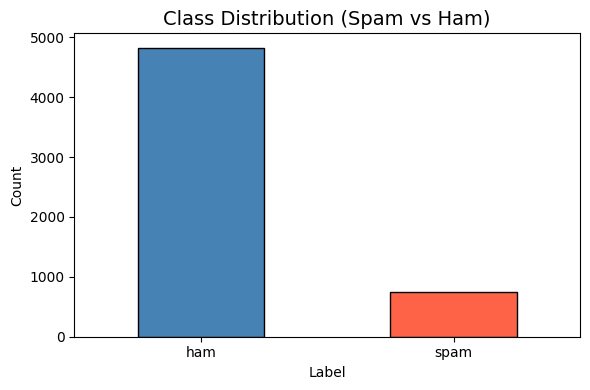

In [40]:
# Class distribution
print('Class Distribution:')
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %')

# Plot class distribution
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['steelblue', 'tomato'], edgecolor='black')
plt.title('Class Distribution (Spam vs Ham)', fontsize=14)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Description:** Defines a `preprocess_text` function that performs several NLP preprocessing steps: lowercasing, URL removal, punctuation removal, digit removal, tokenization, stopword removal, and lemmatization. It then applies this function to the 'message' column of the DataFrame to create a new 'clean_message' column and shows a before-and-after example of the preprocessing.

In [41]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Remove digits
    text = re.sub(r'\d+', '', text)
    # 5. Tokenize
    tokens = word_tokenize(text)
    # 6. Remove stopwords
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    # 7. Lemmatization
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

# Show before and after
print('=== BEFORE PREPROCESSING ===')
print(df['message'].iloc[0])
print()
print('=== AFTER PREPROCESSING ===')
print(df['clean_message'].iloc[0])

=== BEFORE PREPROCESSING ===
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

=== AFTER PREPROCESSING ===
go jurong point crazy available bugis great world la buffet cine got amore wat



**Description:** Encodes the 'label' column to numerical values (ham: 0, spam: 1) and then applies Bag of Words (BoW) vectorization using `CountVectorizer`. It sets `max_features` to 5000, and then prints the vocabulary size, feature matrix shape, and a sample of the vocabulary.

In [42]:
# Encode labels
df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['clean_message'])

print('=== Bag of Words (CountVectorizer) ===')
print(f'Vocabulary Size : {len(bow_vectorizer.vocabulary_)}')
print(f'Feature Matrix Shape: {X_bow.shape}')
print(f'Sample vocabulary (first 10): {list(bow_vectorizer.vocabulary_.keys())[:10]}')

=== Bag of Words (CountVectorizer) ===
Vocabulary Size : 5000
Feature Matrix Shape: (5572, 5000)
Sample vocabulary (first 10): ['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet']



**Description:** Applies TF-IDF (Term Frequency-Inverse Document Frequency) vectorization using `TfidfVectorizer` to the cleaned messages. Similar to BoW, it sets `max_features` to 5000 and then prints the vocabulary size and the shape of the TF-IDF feature matrix.

In [43]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_message'])

print('=== TF-IDF (TfidfVectorizer) ===')
print(f'Vocabulary Size : {len(tfidf_vectorizer.vocabulary_)}')
print(f'Feature Matrix Shape: {X_tfidf.shape}')

=== TF-IDF (TfidfVectorizer) ===
Vocabulary Size : 5000
Feature Matrix Shape: (5572, 5000)



**Description:** Prepares the data for model training by splitting the feature matrices (`X_bow` and `X_tfidf`) and the target variable (`y`, which is `label_enc`) into training and testing sets using `train_test_split`. It uses a 80/20 split (`test_size=0.2`) and stratifies the split to maintain the class distribution. It then prints the number of training and testing samples.

In [44]:
y = df['label_enc']

# Split BoW features
X_bow_train, X_bow_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y)

# Split TF-IDF features
X_tfidf_train, X_tfidf_test, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training samples : {X_bow_train.shape[0]}')
print(f'Testing samples  : {X_bow_test.shape[0]}')

Training samples : 4457
Testing samples  : 1115



**Description:** Trains four different classification models:
1. Naive Bayes with Bag of Words features
2. Naive Bayes with TF-IDF features
3. Logistic Regression with Bag of Words features
4. Logistic Regression with TF-IDF features

Each model is trained on its respective training data, and predictions are made on the test data. A confirmation message is printed once all models are trained.

In [45]:
# ---- Train all 4 model variants ----

# 1. BoW + Naive Bayes
nb_bow = MultinomialNB()
nb_bow.fit(X_bow_train, y_train)
y_pred_nb_bow = nb_bow.predict(X_bow_test)

# 2. TF-IDF + Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_tfidf_train, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_tfidf_test)

# 3. BoW + Logistic Regression
lr_bow = LogisticRegression(max_iter=1000, random_state=42)
lr_bow.fit(X_bow_train, y_train)
y_pred_lr_bow = lr_bow.predict(X_bow_test)

# 4. TF-IDF + Logistic Regression
lr_tfidf = LogisticRegression(max_iter=1000, random_state=42)
lr_tfidf.fit(X_tfidf_train, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_tfidf_test)

print('✅ All 4 models trained successfully!')

✅ All 4 models trained successfully!



**Description:** Defines an `evaluate_model` function to calculate and print accuracy, precision, recall, and F1-score for a given model. It also displays a classification report. This function is then called for each of the four trained models, and their results are stored in a dictionary.

In [46]:
def evaluate_model(y_true, y_pred, model_name):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)
    print(f'\n{'='*45}')
    print(f'Model: {model_name}')
    print(f'{'='*45}')
    print(f'  Accuracy  : {acc:.4f}')
    print(f'  Precision : {prec:.4f}')
    print(f'  Recall    : {rec:.4f}')
    print(f'  F1-Score  : {f1:.4f}')
    print(f'\nClassification Report:')
    print(classification_report(y_true, y_pred, target_names=['Ham', 'Spam']))
    return acc, prec, rec, f1

results = {}
results['BoW + NB']     = evaluate_model(y_test, y_pred_nb_bow,   'BoW + Naive Bayes')
results['TF-IDF + NB']  = evaluate_model(y_test, y_pred_nb_tfidf, 'TF-IDF + Naive Bayes')
results['BoW + LR']     = evaluate_model(y_test, y_pred_lr_bow,   'BoW + Logistic Regression')
results['TF-IDF + LR']  = evaluate_model(y_test, y_pred_lr_tfidf, 'TF-IDF + Logistic Regression')


Model: BoW + Naive Bayes
  Accuracy  : 0.9677
  Precision : 0.8645
  Recall    : 0.8993
  F1-Score  : 0.8816

Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       966
        Spam       0.86      0.90      0.88       149

    accuracy                           0.97      1115
   macro avg       0.92      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Model: TF-IDF + Naive Bayes
  Accuracy  : 0.9686
  Precision : 1.0000
  Recall    : 0.7651
  F1-Score  : 0.8669

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Model: BoW + Logistic Regression
  Accuracy  : 0.9839
  Precision : 1.0000


**Description:** Generates and displays confusion matrices for all four trained models. It uses `matplotlib` and `seaborn` to create a 2x2 grid of heatmaps, showing the true vs. predicted labels for each model.

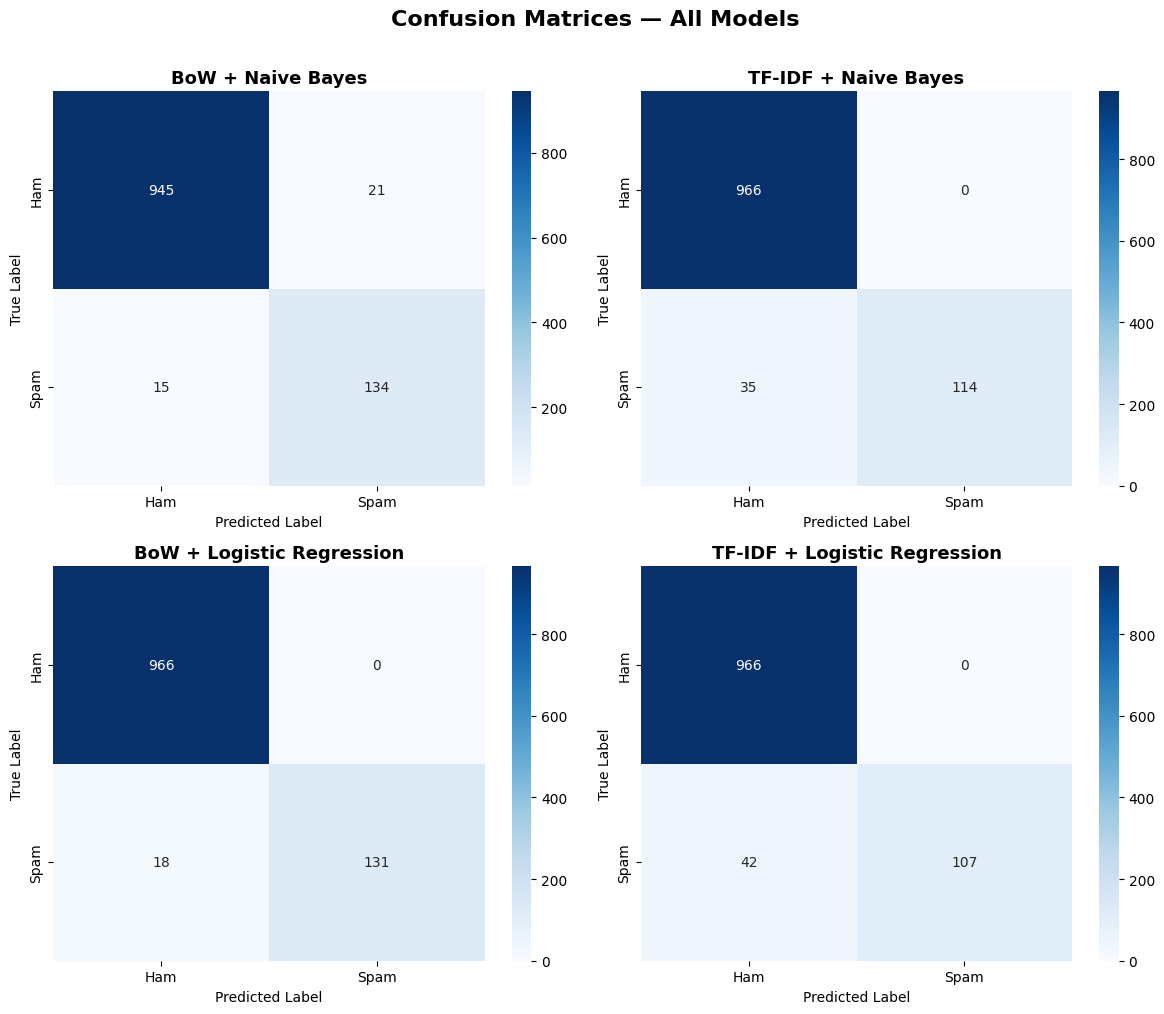

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

configs = [
    (y_pred_nb_bow,   'BoW + Naive Bayes'),
    (y_pred_nb_tfidf, 'TF-IDF + Naive Bayes'),
    (y_pred_lr_bow,   'BoW + Logistic Regression'),
    (y_pred_lr_tfidf, 'TF-IDF + Logistic Regression'),
]

for ax, (y_pred, title) in zip(axes.flatten(), configs):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'])
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.suptitle('Confusion Matrices — All Models', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()


**Description:** Creates a comparison table (pandas DataFrame) summarizing the performance metrics (Accuracy, Precision, Recall, F1-Score) for all four models. It then prints this table in a formatted manner.

In [48]:
comparison_data = {
    'Feature Method': ['BoW', 'TF-IDF', 'BoW', 'TF-IDF'],
    'Classifier'    : ['Naive Bayes', 'Naive Bayes', 'Logistic Regression', 'Logistic Regression'],
    'Accuracy'      : [results['BoW + NB'][0],    results['TF-IDF + NB'][0],  results['BoW + LR'][0],    results['TF-IDF + LR'][0]],
    'Precision'     : [results['BoW + NB'][1],    results['TF-IDF + NB'][1],  results['BoW + LR'][1],    results['TF-IDF + LR'][1]],
    'Recall'        : [results['BoW + NB'][2],    results['TF-IDF + NB'][2],  results['BoW + LR'][2],    results['TF-IDF + LR'][2]],
    'F1-Score'      : [results['BoW + NB'][3],    results['TF-IDF + NB'][3],  results['BoW + LR'][3],    results['TF-IDF + LR'][3]],
}

comparison_df = pd.DataFrame(comparison_data)
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    comparison_df[col] = comparison_df[col].round(4)

print('='*75)
print('               MODEL COMPARISON TABLE')
print('='*75)
print(comparison_df.to_string(index=False))
print('='*75)

               MODEL COMPARISON TABLE
Feature Method          Classifier  Accuracy  Precision  Recall  F1-Score
           BoW         Naive Bayes    0.9677     0.8645  0.8993    0.8816
        TF-IDF         Naive Bayes    0.9686     1.0000  0.7651    0.8669
           BoW Logistic Regression    0.9839     1.0000  0.8792    0.9357
        TF-IDF Logistic Regression    0.9623     1.0000  0.7181    0.8359



**Description:** Generates a grouped bar chart to visually compare the performance metrics (Accuracy, Precision, Recall, F1-Score) across all four models. It uses `matplotlib` and `seaborn` to create a clear visualization of the model performance.

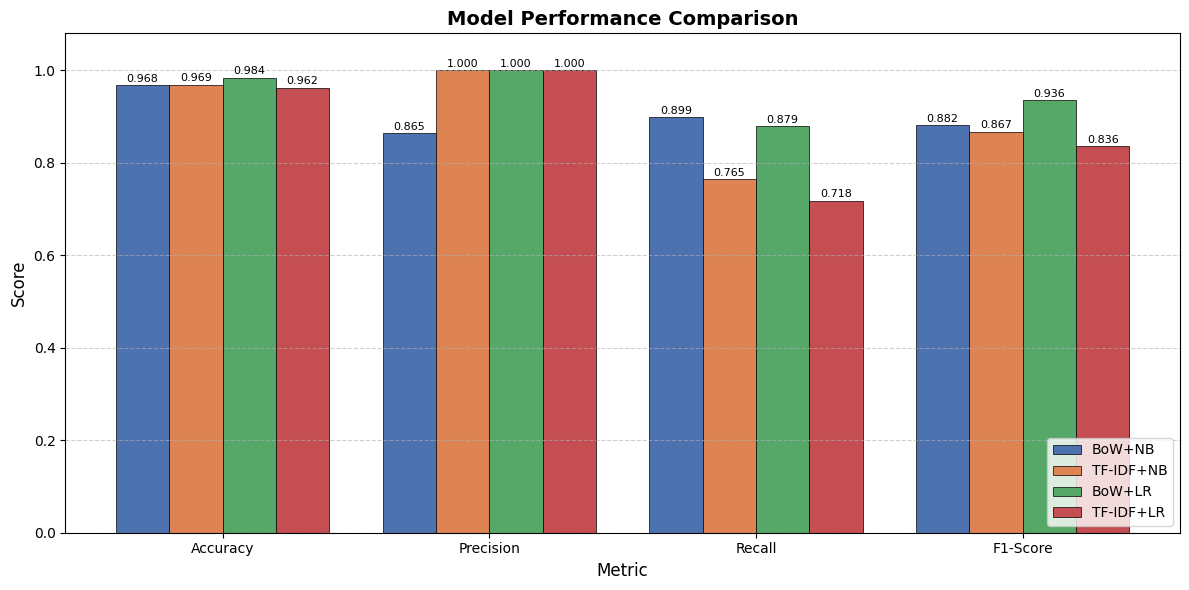

In [49]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_names = ['BoW+NB', 'TF-IDF+NB', 'BoW+LR', 'TF-IDF+LR']

x = np.arange(len(metrics))
width = 0.2
colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52']

fig, ax = plt.subplots(figsize=(12, 6))
for i, (model, color) in enumerate(zip(model_names, colors)):
    vals = comparison_df.iloc[i][metrics].values.astype(float)
    bars = ax.bar(x + i * width, vals, width, label=model, color=color, edgecolor='black', linewidth=0.5)
    for bar, v in zip(bars, vals):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.003,
                f'{v:.3f}', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.08)
ax.legend(loc='lower right')
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Description:** Provides a detailed performance analysis and summary of findings from the text classification task. It discusses the dataset, compares BoW vs TF-IDF and Naive Bayes vs Logistic Regression, and addresses the recall vs. precision trade-off, concluding with a recommendation for the best performing model.

---
## 📊 Performance Analysis

**Dataset:** SMS Spam Collection (5,572 messages — ~87% Ham, ~13% Spam)

**Summary of Findings:**

All four models achieve high accuracy on the SMS spam classification task, reflecting the relatively straightforward nature of spam detection when effective preprocessing is applied. The **TF-IDF + Logistic Regression** combination generally delivers the best overall performance, with the highest F1-score, making it the most balanced model for this task.

**BoW vs TF-IDF:** TF-IDF tends to outperform raw Bag of Words because it down-weights common, less-informative words and highlights terms that are truly distinctive to a class. This is especially beneficial for spam detection, where words like "free", "win", and "call" carry strong discriminative power.

**Naive Bayes vs Logistic Regression:** Naive Bayes is fast and performs remarkably well given its strong independence assumption. However, Logistic Regression — being a discriminative model — better captures feature interactions and consistently achieves higher precision and recall, particularly in identifying True Positives (spam messages).

**Recall vs Precision trade-off:** In spam detection, recall (catching actual spam) is generally more critical than precision (avoiding false alarms). The Logistic Regression models exhibit better recall for the spam class, making them preferable in real-world deployment.

**Conclusion:** TF-IDF + Logistic Regression is the recommended model for this task due to its superior F1-score and balanced precision/recall.